Question 1 : <br/>
1. Write a function that uses the forward Euler method to solve the ODE x
′
(t) = −2x(t), with
initial condition x(0) = 5, in the interval [0, 10], computes a polynomial that passes through
the discrete solution points of the ODE. Visualize the solution for discretization step sizes
{0.1, 0.5, 1, 2, 3} along with the exact solution, all on the same figure.

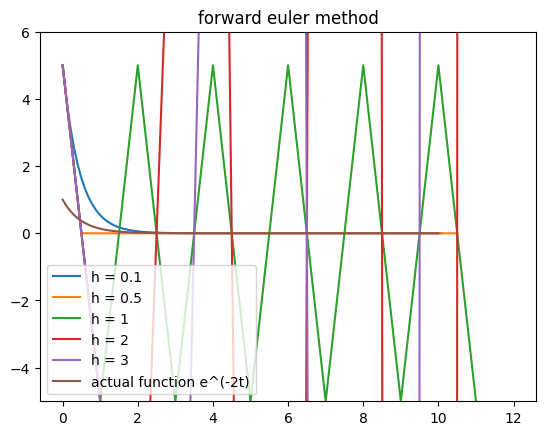

In [9]:
import matplotlib.pyplot as plt
import numpy as np

a = 0
b = 10
x0, t0 = 5, 0
discretization_steps = [0.1, 0.5, 1, 2, 3]
for h in discretization_steps:
    x_values = [x0, ]
    t_values = [t0, ]
    while t_values[-1] <= b:
        tn = t_values[-1]
        t_values.append(tn + h)
        xn = x_values[-1]
        x_values.append(xn + h*(-2*xn))
    plt.plot(t_values, x_values, label = "h = " + str(h))

# exact solution
f = lambda t: np.exp(-2*t)
t_values = np.linspace(a, b, 1000)
x_values = f(t_values)
plt.plot(t_values, x_values, label = "actual function e^(-2t)")
plt.title("forward euler method")
plt.ylim(min(x_values)-5, max(x_values)+5)
plt.legend()
plt.show()


Question2) <br/>
Write a function that uses the backward Euler method to solve the ODE x′
(t) = −2x(t), with
initial condition x(0) = 5, in the interval [0,10], computes a polynomial that passes through
the discrete solution points of the ODE. Visualize the solution for discretization step sizes
{0.1,0.5,1,2,3} along with the exact solution, all on the same figure.

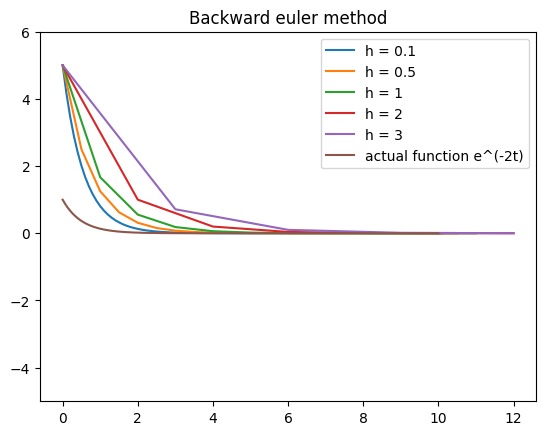

In [10]:
import matplotlib.pyplot as plt
import numpy as np

a = 0
b = 10
x0, t0 = 5, 0
discretization_steps = [0.1, 0.5, 1, 2, 3]
for h in discretization_steps:
    x_values = [x0, ]
    t_values = [t0, ]
    while t_values[-1] <= b:
        tn = t_values[-1]
        t_values.append(tn + h)
        xn = x_values[-1]
        x_values.append(xn/(1+2*h))
    plt.plot(t_values, x_values, label = "h = " + str(h))

# exact solution
f = lambda t: np.exp(-2*t)
t_values = np.linspace(a, b, 1000)
x_values = f(t_values)
plt.plot(t_values, x_values, label = "actual function e^(-2t)")
plt.ylim(min(x_values)-5, max(x_values)+5)
plt.title("Backward euler method")
plt.legend()
plt.show()


<h1> Question 3) </h1>
A simple gravity pendulum is an idealized mathematical model of a real pendulum. It has a
weight (or bob) on the end of a massless cord suspended from a pivot, without friction1
. The
ODE which represents the motion of a simple pendulum is
d
2
(θ(t))
dt2
+
g
L
sin θ(t) = 0
where g is acceleration due to gravity, L is the length of the pendulum, and θ is the angular
displacement. Use the forward Euler method to estimate the pendulum’s position. You are
also expected to animate motion of the pendulum using Python’s matplotlib library.

<h1> Question 4) </h1>
Since its introduction in the 1920’s, the Van der Pol equation2 has been a prototype for systems
with self-excited limit cycle oscillations. This equation is now considered as a basic model for
oscillatory processes in physics, electronics, biology, neurology, sociology and economic. The
equation is described by the following second order ODE:
d
2x(t)
dt2
− µ(1 − x(t)
2
)
dx(t)
dt + x(t) = 0
It is known that solution of the above equation exhibits a limit cycle when µ > 0. Write a
function that takes the parameter µ (a positive real number) and initial condition as arguments,
and computes period of the limit cycle. Your code is also expected to plot the solution.
HINT: Use the function scipy.integrate.solve ivp

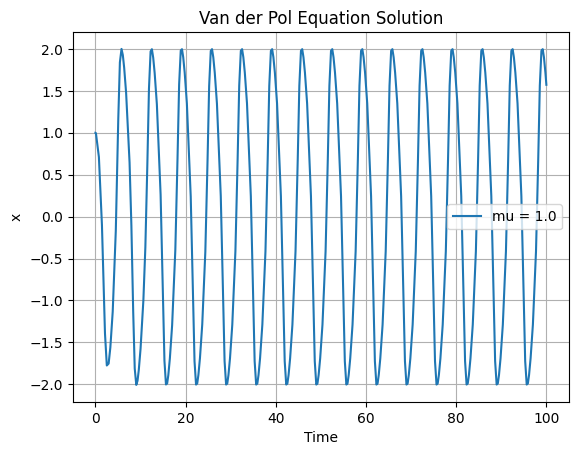

Period of the limit cycle: 3.308951584813654


In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def van_der_pol(t, y, mu):
    x, v = y
    dxdt = v
    dvdt = mu * (1 - x**2) * v - x
    return [dxdt, dvdt]

def find_limit_cycle_period(mu, initial_conditions, t_span):
    sol = solve_ivp(van_der_pol, t_span, initial_conditions, args=(mu,), dense_output=True)
    t_eval = np.linspace(t_span[0], t_span[1], 100)
    sol_values = sol.sol(t_eval)

    # print(t_eval)
    # print(sol_values)

    # Find the indices where x crosses zero (indicating one complete cycle)
    zero_crossings = np.where(np.diff(np.signbit(sol_values[0])))[0]
    # print(zero_crossings)
    periods = np.diff(t_eval[zero_crossings])
    period = np.mean(periods)
    
    # Plot the solution trajectory
    plt.plot(sol.t, sol.y[0], label=f'mu = {mu}')
    plt.xlabel('Time')
    plt.ylabel('x')
    plt.title('Van der Pol Equation Solution')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return period

# Example usage
mu = 1.0
initial_conditions = [1.0, 0.0]  # Example initial conditions
t_span = [0, 100]  # Time span for integration
period = find_limit_cycle_period(mu, initial_conditions, t_span)
print("Period of the limit cycle:", period)


In [13]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def three_body_problem(initial_positions, t_span):
    def equations_of_motion(t, y):
        r1, v1, r2, v2, r3, v3 = np.split(y, 6)
        
        r12 = np.linalg.norm(r2 - r1) ** 3
        r13 = np.linalg.norm(r3 - r1) ** 3
        r23 = np.linalg.norm(r3 - r2) ** 3
        
        a1 = (r2 - r1) / r12 + (r3 - r1) / r13
        a2 = (r1 - r2) / r12 + (r3 - r2) / r23
        a3 = (r1 - r3) / r13 + (r2 - r3) / r23
        
        return np.concatenate([v1, a1, v2, a2, v3, a3])

    initial_velocities = np.zeros_like(initial_positions)
    y0 = np.concatenate([initial_positions.flatten(), initial_velocities.flatten()])  # Flatten both arrays
    
    sol = solve_ivp(equations_of_motion, t_span, y0, t_eval=np.linspace(t_span[0], t_span[1], 1000))
    
    # Reshape solution to separate positions and velocities
    y_solution = sol.y.reshape((6, -1, len(sol.t)))

    # Plot the trajectories
    plt.plot(y_solution[0], y_solution[1], label='Body 1')
    plt.plot(y_solution[2], y_solution[3], label='Body 2')
    plt.plot(y_solution[4], y_solution[5], label='Body 3')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Trajectories of Three Bodies')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
initial_positions = np.array([[0, 0], [1, 0], [0, 1]])  # Initial positions of the three bodies
t_span = [0, 10]  # Time span for integration

three_body_problem(initial_positions, t_span)


/tmp/ipykernel_2733415/4041363421.py:13: RuntimeWarning: invalid value encountered in divide
  a1 = (r2 - r1) / r12 + (r3 - r1) / r13
/tmp/ipykernel_2733415/4041363421.py:15: RuntimeWarning: invalid value encountered in divide
  a3 = (r1 - r3) / r13 + (r2 - r3) / r23


KeyboardInterrupt: 